In [1]:
from functions import *

In [2]:
import sys, importlib
importlib.reload(sys.modules['functions'])
from functions import *

**Analysing SN2010ev, in galaxy NGC 3244, which has redshift z=0.009213 ± 7.00e-6 (He)**

# Importing data

In [3]:
#import data
file_name="../SN2010ev.fits"
data = fits.open(file_name)
cube = data[1].data   # this is the cube, a (3681 x 341 x 604) matrix with fluxes at different 3681 wavelengths and 308 x 318 spatial pixels ("spaxels")
header = data[1].header # this has information on the data cube
ecube = data[2].data # this is the cube uncertainty (3681 x 341 x 604)
print(np.shape(cube))


print(cube[0])
print(cube[0][200][300])

x_len=len(cube[0][0])
y_len=len(cube[0])

(3681, 341, 604)
[[     nan      nan      nan ...      nan      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]
 ...
 [     nan      nan      nan ... 69.65055      nan      nan]
 [     nan      nan      nan ... 68.30897      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]]
91.866684


In [4]:
#  -- following is to the get the wavelength array
CRVAL = float(header["CRVAL3"])
NAXIS = int(header["NAXIS3"])
CDELT = float(header["CD3_3"])
CRPIX = float(header["CRPIX3"])
wave = np.array(CRVAL + CDELT * (np.arange(NAXIS) - CRPIX))

# Looking for stars

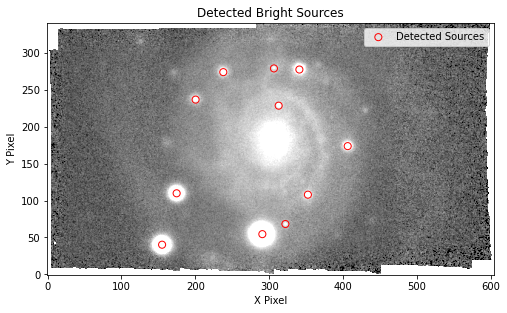

Source at: x=154.95, y=40.22
Source at: x=290.60, y=54.51
Source at: x=321.78, y=68.22
Source at: x=352.23, y=107.91
Source at: x=174.64, y=109.78
Source at: x=406.10, y=173.60
Source at: x=312.69, y=228.34
Source at: x=200.31, y=236.53
Source at: x=237.76, y=273.71
Source at: x=340.71, y=277.24
Source at: x=306.30, y=278.73


In [12]:
na_rest=5890

i=findWavelengths(wave, na_rest)[1]


image = cube[i+10]

if image.ndim == 3:
    image = np.mean(image, axis=-1)

mean, median, std = sigma_clipped_stats(image, sigma=20.0)

# using DAOStarFinder to detect stars
daofind = DAOStarFinder(fwhm=8.0, threshold=3.0*std)
sources = daofind(image - median)

x_coords, y_coords = sources['xcentroid'], sources['ycentroid']

plt.figure(figsize=(8,6))
norm = simple_norm(image, 'sqrt')  # Better contrast
lo,up = np.nanpercentile(image,2),np.nanpercentile(image,98)
plt.imshow(image, cmap='gray', norm=norm, origin='lower',clim=(lo,up))
plt.scatter(x_coords, y_coords, s=50, edgecolor='red', facecolor='none', label="Detected Sources")
plt.legend()
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.title("Detected Bright Sources")
plt.show()

for x, y in zip(x_coords, y_coords):
    print(f"Source at: x={x:.2f}, y={y:.2f}")

finding ra,dec of center of image

In [13]:
wcs = WCS(data[1].header) 

center_x=int(x_len/2)
center_y=int(y_len/2)

ra, dec, _ = wcs.all_pix2world(center_x, center_y, 0, 0)

print(ra,dec)

156.37094651570212 -39.82809141441123


In [37]:
list(zip(x_coords, y_coords))
sources=list(zip(x_coords, y_coords))

sources = [[int(x) for x in row] for row in sources]
sources=np.array(sources)
#sources=sources[0:len(sources)-3]

In [38]:
star_ra,star_dec,star_par,star_parer=match_gaia(sources,header,ra,dec)

[<SkyCoord (ICRS): (ra, dec) in deg
    [(156.38165309, -39.83531402), (156.3718138 , -39.83453593),
     (156.36957115, -39.83375796), (156.36732881, -39.83159106),
     (156.38020613, -39.83148069), (156.36342311, -39.82792389),
     (156.37022359, -39.82486913), (156.37832539, -39.82442511),
     (156.37564907, -39.82236948), (156.36819862, -39.82214671),
     (156.370658  , -39.82209139)]>, <SpectralCoord 
   (target: <ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
                (156.380417, -39.8275, 1000.)
             (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
                (0., 0., 0.)>)
  [4.74969238e-07, 4.74969238e-07, 4.74969238e-07, 4.74969238e-07,
   4.74969238e-07, 4.74969238e-07, 4.74969238e-07, 4.74969238e-07,
   4.74969238e-07, 4.74969238e-07, 4.74969238e-07] m>]
INFO: Query finished. [astroquery.utils.tap.core]


In [39]:
star_ra

array([156.38097111, 156.37118349, 156.3689224 , 156.36671578,
       156.37955932, 156.3628213 , 156.36957374, 156.37770921,
       156.37499996, 156.36755243, 156.37005896])

In [49]:
out=gaia_parameters(star_ra,star_dec)

Searching for star with RA = 156.38097110731218, Dec = -39.83547621571639
INFO: Query finished. [astroquery.utils.tap.core]
Parallax: 0.5239866306325364 ± 0.02367854118347168
Effective temperature:  5891.3174
Surface gravity log(g) :  4.1573
Metalicity:  -0.3359
 
Searching for star with RA = 156.37118348679695, Dec = -39.834671881098416
INFO: Query finished. [astroquery.utils.tap.core]
Parallax: 0.7982890719554844 ± 0.013275785371661186
Effective temperature:  --
Surface gravity log(g) :  --
Metalicity:  --
 
Searching for star with RA = 156.3689223993388, Dec = -39.83390582820141


/tmp/ipykernel_87389/760766783.py:46: UserWarning: Warning: converting a masked element to nan.
  eff_t_array[i] = result[0]["teff_gspphot"]
/tmp/ipykernel_87389/760766783.py:47: UserWarning: Warning: converting a masked element to nan.
  surface_g_array[i] = result[0]["logg_gspphot"]
/tmp/ipykernel_87389/760766783.py:48: UserWarning: Warning: converting a masked element to nan.
  metallicity_array[i] = result[0]["mh_gspphot"]


INFO: Query finished. [astroquery.utils.tap.core]
Parallax: 0.6347988756479583 ± 0.16147708892822266
Effective temperature:  3722.7979
Surface gravity log(g) :  4.6111
Metalicity:  -0.6348
 
Searching for star with RA = 156.36671577925907, Dec = -39.8317028130207
INFO: Query finished. [astroquery.utils.tap.core]
Parallax: 0.1780072452591849 ± 0.1396242380142212
Effective temperature:  4985.641
Surface gravity log(g) :  4.7708
Metalicity:  -3.9862
 
Searching for star with RA = 156.37955932098166, Dec = -39.83160598408886
INFO: Query finished. [astroquery.utils.tap.core]
Parallax: 0.9524545474811911 ± 0.03131597489118576
Effective temperature:  4950.3467
Surface gravity log(g) :  4.4546
Metalicity:  -0.0817
 
Searching for star with RA = 156.36282130389935, Dec = -39.82805199668578
INFO: Query finished. [astroquery.utils.tap.core]
Parallax: 0.3398719293275349 ± 0.06979161500930786
Effective temperature:  5296.0205
Surface gravity log(g) :  4.6256
Metalicity:  -0.5887
 
Searching for sta

In [50]:
out

(array([0.52398663, 0.79828907, 0.63479888, 0.17800725, 0.95245455,
        0.33987193, 0.29746218, 0.50470875, 0.20465208, 0.20277917,
        0.09458723]),
 array([5891.31738281,           nan, 3722.79785156, 4985.64111328,
        4950.34667969, 5296.02050781,           nan, 4414.33740234,
        5579.58105469, 5944.46386719,           nan]),
 array([4.1573    ,        nan, 4.6111002 , 4.77080011, 4.45459986,
        4.62559986,        nan, 4.71729994, 4.64480019, 4.45569992,
               nan]),
 array([-0.33590001,         nan, -0.63480002, -3.98620009, -0.0817    ,
        -0.5887    ,         nan, -1.00619996, -3.6479001 , -0.61070001,
                nan]))

In [28]:
"""# Assuming star_ra and star_dec are already defined
parallax_array = np.full(len(star_ra), np.nan)  # initialize with NaNs

for i in range(len(star_ra)):
    ra = star_ra[i]
    dec = star_dec[i]
    
    if np.isnan(ra) or np.isnan(dec):
        continue  # skip if either value is NaN

    print(f"Searching for star with RA = {ra}, Dec = {dec}")

    coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')
    radius_deg = (1 * u.arcsec).to(u.deg).value

    query = f"""
    SELECT source_id, ra, dec, phot_g_mean_mag, bp_rp, parallax, parallax_error
    FROM gaiaedr3.gaia_source
    WHERE CONTAINS(
      POINT('ICRS', ra, dec),
      CIRCLE('ICRS', {coord.ra.deg}, {coord.dec.deg}, {radius_deg})
    ) = 1
    """

    try:
        job = Gaia.launch_job_async(query)
        result = job.get_results()

        if len(result) == 0:
            print("No match found.")
        else:
            # Optional: select closest match if more than one (but radius is small)
            parallax_array[i] = result[0]["parallax"]
            print(f"Parallax: {result[0]['parallax']} ± {result[0]['parallax_error']}")
    
    except Exception as e:
        print(f"Query failed for index {i}: {e}")
    
    print(" ")

"""

Searching for star with RA = 156.38097110731218, Dec = -39.83547621571639
INFO: Query finished. [astroquery.utils.tap.core]
Parallax: 0.5239866306325364 ± 0.02367854118347168
 
Searching for star with RA = 156.37118348679695, Dec = -39.834671881098416
INFO: Query finished. [astroquery.utils.tap.core]
Parallax: 0.7982890719554844 ± 0.013275785371661186
 
Searching for star with RA = 156.36671577925907, Dec = -39.8317028130207
INFO: Query finished. [astroquery.utils.tap.core]
Parallax: 0.1780072452591849 ± 0.1396242380142212
 
Searching for star with RA = 156.37955932098166, Dec = -39.83160598408886
INFO: Query finished. [astroquery.utils.tap.core]
Parallax: 0.9524545474811911 ± 0.03131597489118576
 
Searching for star with RA = 156.36282130389935, Dec = -39.82805199668578
INFO: Query finished. [astroquery.utils.tap.core]
Parallax: 0.3398719293275349 ± 0.06979161500930786
 
Searching for star with RA = 156.36755242966674, Dec = -39.82229229639933
INFO: Query finished. [astroquery.utils.t

In [26]:
from astropy.coordinates import Angle
import astropy.units as u

ra_hms = Angle(ra, unit=u.deg).to_string(unit=u.hour, sep=':')
ra_hms;

# Na lines

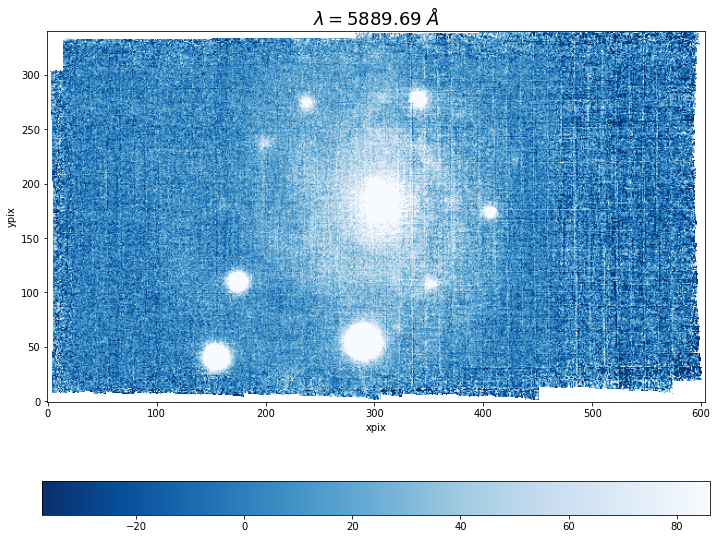

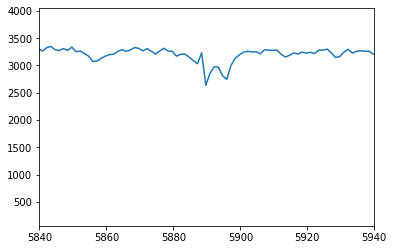

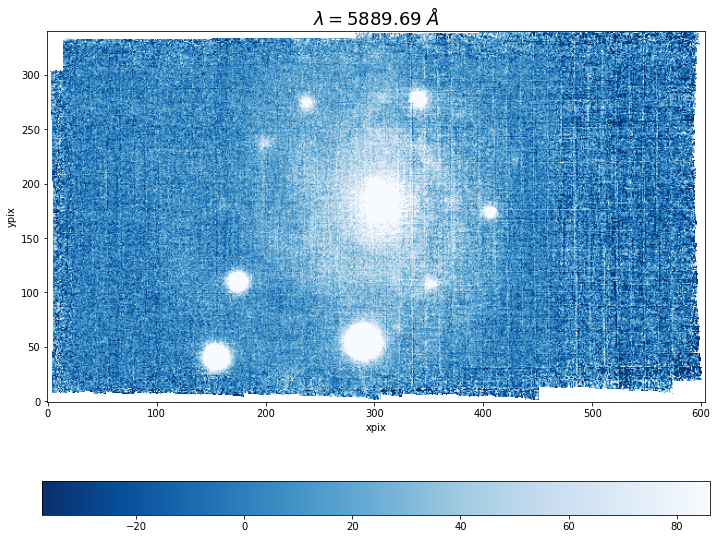

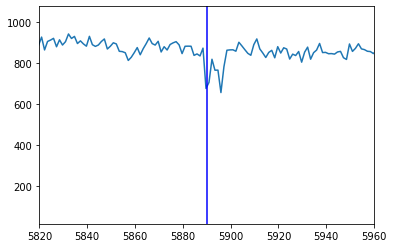

In [11]:

wave_selection=[]

wavelen,index=findWavelengths(wave, na_rest)

y_pos=50#200
x_pos=290#300
plot_image(cube[index],wavelen,index,'Blues_r')


plt.plot(wave, cube[:,y_pos,x_pos])
plt.xlim(na_rest-50,na_rest+50)

y_pos=40#200
x_pos=160#300
plot_image(cube[index],wavelen,index,'Blues_r')


plt.plot(wave, cube[:,y_pos,x_pos])
plt.xlim(5820,5960)#na_rest-50,na_rest+50)
plt.axvline(x = na_rest, color = 'b', label = 'axvline - full height')


# Picking region

In [224]:
y_pos=40#200
x_pos=160#300

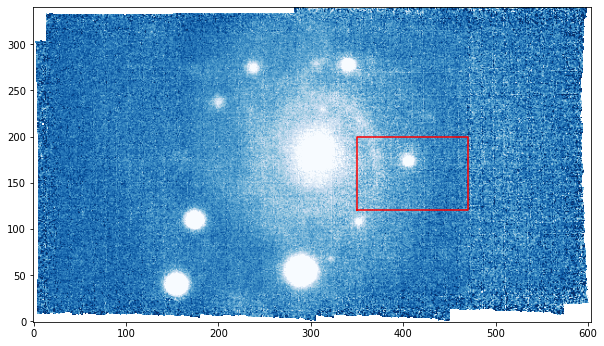

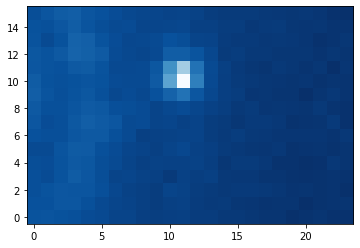

(8, 12)


In [225]:
x1=350
x2=470
y1=120
y2=200

"""x1=x_pos-30
x2=x_pos+100
y1=y_pos
y2=y_pos+130"""

region=cube[:,y1:y2,x1:x2]
region_err=ecube[:,y1:y2,x1:x2]
           
i=findWavelengths(wave, na_rest)[1]


lo,up = np.nanpercentile(cube[i],2),np.nanpercentile(cube[i],98)
plt.figure(figsize=(10, 8))
plt.imshow(cube[i],cmap='Blues_r',origin='lower',clim=(lo,up))


x_coords = [x1, x1, x2, x2, x1]
y_coords = [y1, y2, y2, y1, y1] 
plt.plot(x_coords, y_coords, 'r-', linewidth=1.5)  # Red outline

plt.show()

plt.imshow(binning(region[10], 5),"Blues_r",origin='lower');

plt.show()

print(np.shape(binning(region[10], 10)))

binned_region=[]
binned_region_err=[]

for w in range(0,len(wave)):
    binned_region.append(binning(region[w], 5))
    binned_region_err.append(binning(region_err[w], 5))
    
binned_region=np.array(binned_region)
binned_region_err=np.array(binned_region_err)

MUSE_err=np.sqrt(np.median(binned_region_err, axis=(1, 2)))

# EW

## EW - parametric

In [331]:
star_i=1
y_pos=sources[star_i][1]#40
x_pos=sources[star_i][0]#160

In [332]:
z=0.009213

In [333]:
na_rest-80

5813.0

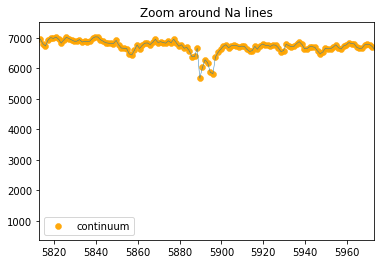

In [334]:
data=cube[:,y_pos,x_pos]

plt.plot(wave,data,linewidth=0.5,alpha=0.95)
plt.scatter(wave,data,s=0.5)

#plt.fill_between(wave,median_bulge - y_err, median_bulge + y_err, color='blue', alpha=0.3, label="Uncertainty")

x_min, x_max= plt.xlim(na_rest-80,na_rest+80)
plt.title("Zoom around Na lines")
x_chopped,y_chopped=chop_data(wave,data,x_min,x_max)

plt.scatter(x_chopped,y_chopped,linewidth=0.5,alpha=0.95,color="orange",label="continuum")
plt.legend()

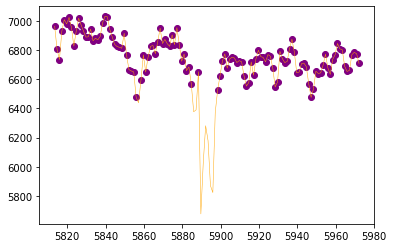

In [335]:
plt.plot(x_chopped,y_chopped,linewidth=0.5,alpha=0.95,color="orange",label="continuum")
#plt.ylim(300,1200)

x1,y1=filterout_peaks(x_chopped,y_chopped,mode="both")
plt.scatter(x1,y1,color="purple")

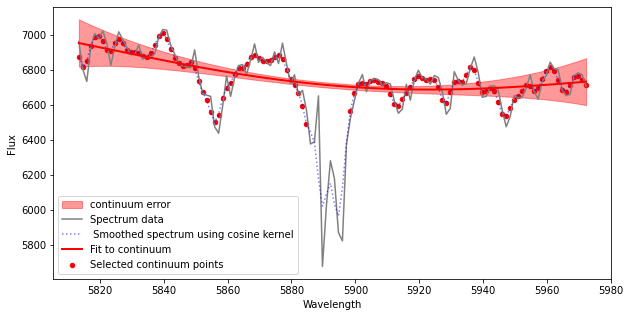

In [336]:
y_smooth=smooth_spectra(y_chopped,kernel_size=6)

continuum_fit, x_continuum, y_continuum, continuum_err =continuum(x_chopped,y_smooth,mode="both")

y_continuum_fit = continuum_fit(x_chopped)


cont_err=continuum_err(x_chopped)
plt.figure(figsize=(10, 5))
plt.fill_between(x_chopped,y_continuum_fit - cont_err, y_continuum_fit + cont_err, color='red', alpha=0.4, label="continuum error")
plt.plot(x_chopped, y_chopped, label="Spectrum data", color="gray")
plt.plot(x_chopped, y_smooth, label=" Smoothed spectrum using cosine kernel", color="blue", alpha=0.5,linestyle="dotted")
plt.plot(x_chopped, y_continuum_fit, label="Fit to continuum", color="red", linewidth=2)
plt.scatter(x_continuum, y_continuum, color="red", s=20, label="Selected continuum points")
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.legend()
#plt.xlim(6400,6500)
plt.show()

Fitting two gaussians

In [221]:
initial_guess = [2,0.5,200,na_rest,1,200,2,1,4.5]
params, covariance = curve_fit(two_gaussian_poly, x_chopped, y_smooth, p0=initial_guess)#input errors!

    
fit = lambda x: two_gaussian_poly(x,*params)

/home/rita13santos/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


!!!! lenx 128


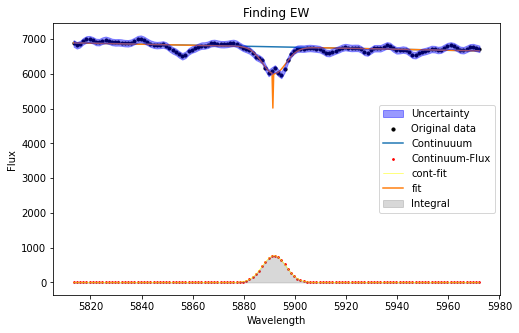

(1.3765630683054317, 0)

In [176]:
EW_parametric(x_chopped,y_smooth,MUSE_err,continuum_fit,continuum_err,method=1,plots=True,fit="Na", central_wavelength=na_rest)


In [138]:
na_rest

5890

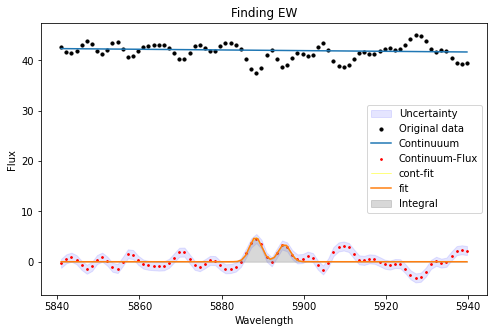

5840.9423828125 5939.6923828125
EW = 0.731  +/- 0.000  at (i,j)= 0 , 0


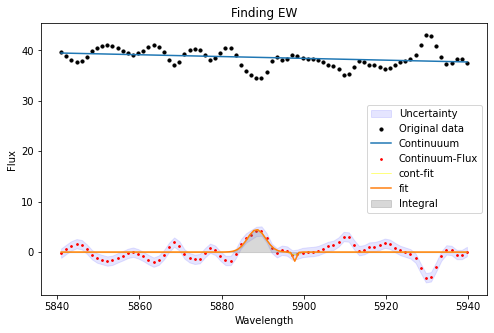

5840.9423828125 5939.6923828125
EW = 0.597  +/- 0.000  at (i,j)= 0 , 1


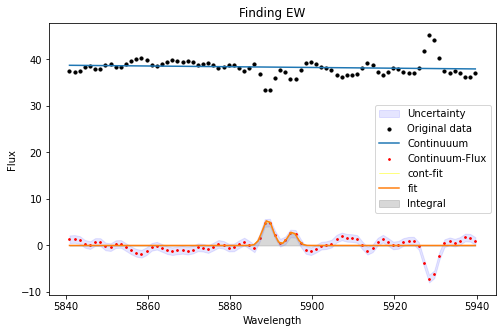

5840.9423828125 5939.6923828125
EW = 0.680  +/- 0.000  at (i,j)= 0 , 2


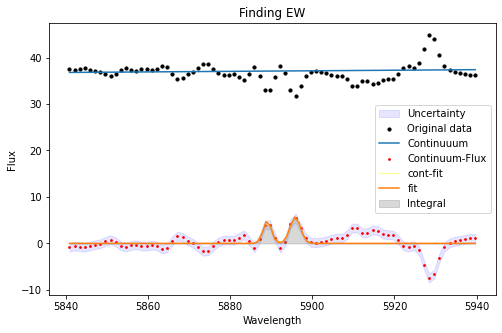

5840.9423828125 5939.6923828125
EW = 0.825  +/- 0.000  at (i,j)= 0 , 3


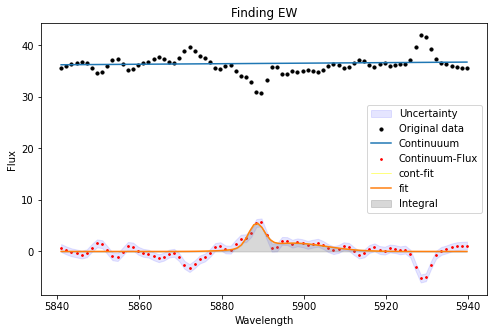

5840.9423828125 5939.6923828125
EW = 1.521  +/- 0.000  at (i,j)= 0 , 4


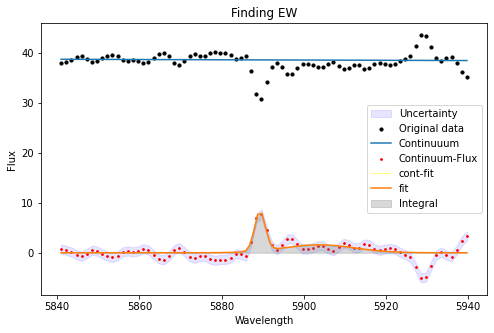

5840.9423828125 5939.6923828125
EW = 1.570  +/- 0.000  at (i,j)= 0 , 5


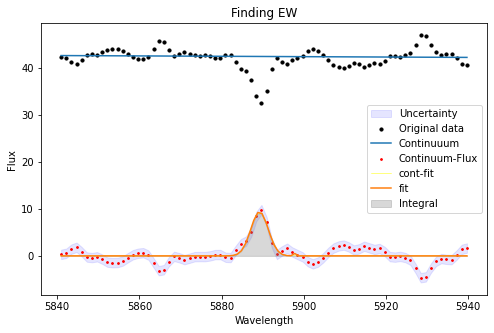

5840.9423828125 5939.6923828125
EW = 1.178  +/- 0.000  at (i,j)= 0 , 6



KeyboardInterrupt



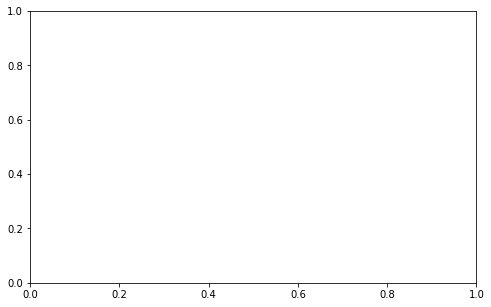

In [139]:
map_P=EW_map_parametric(binned_region,wave,MUSE_err,na_rest, method=0, fit="Na",mode="dips",kernel_size=6,plots=True)


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

data = np.transpose(map_P[0])
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
cmap = plt.cm.Blues_r.copy()
cmap.set_bad(color='yellow')
im1 = ax[0].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im1, ax=ax[0], orientation="horizontal")
ax[0].set_title("EW (parametric approach)")

#####

data= np.transpose(abs(map_P[1]/map_P[0]))
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im2 = ax[1].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im2, ax=ax[1], orientation="horizontal")
ax[1].set_title(r"$\sigma_{\mathrm{EW}}/\mathrm{EW}$ (parametric approach)")

#####

data = binned_region[i]
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im3 = ax[2].imshow(data, cmap='Blues_r', origin='lower', clim=(lo, up))
fig.colorbar(im3, ax=ax[2], orientation="horizontal")
ax[2].set_title("Fluxes")

plt.tight_layout()
plt.show()

## Non parametric

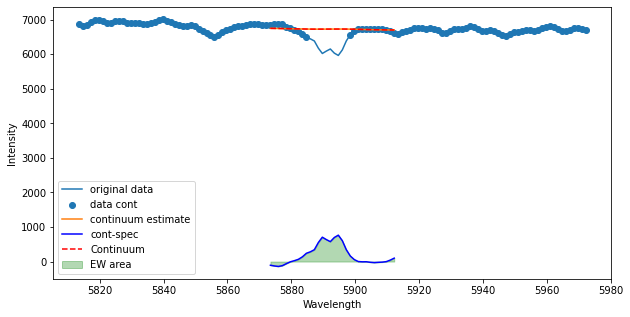

EW= 1.05  +/-  0.0858497769834649


In [337]:
### na_rest=(5890+5896)/2

# continuum
x,y=x_chopped,y_smooth
x_cont,y_cont=filterout_peaks(x,y,mode="both")

kernel_size=60
kernel = cosine_kernel(kernel_size)
cont = convolve1d(y_cont, kernel, mode='nearest')
interp=interp1d(x_cont, cont, kind='cubic')



# zooming around Na lines
#bound1=na_rest-8
#bound2=na_rest+8
v=1000
bound1=na_rest*(1-v/(3*10**5))

bound2=na_rest*(1+v/(3*10**5))
x,y=chop_data(x,y,bound1,bound2)

cont = interp(x)

# Compute the excess intensity above the continuum
excess_intensity = (cont-y)/cont
err_f=mad(y)
g = interp1d(x, excess_intensity, kind='cubic')

# Integrate the excess intensity (area over the continuum)
area_over_continuum = trapz(excess_intensity, x)
#continuum_summed = simps(continuum_fit(x), x)

# Compute uncertainty

err_cont=mad(interp(x))
err=error_non_parametric(x[2]-x[1],interp(x),err_cont,g(x),err_f)


plt.figure(figsize=(10, 5))
plt.plot()
plt.plot(x,y,label="original data")
plt.scatter(x_cont,y_cont,label="data cont")
plt.plot(x,cont,label="continuum estimate")
plt.plot(x, cont-y, label="cont-spec", color="blue")
plt.plot(x, cont, label="Continuum", linestyle="dashed", color="red")
plt.fill_between(x, cont-y, 0, alpha=0.3, color="green", label="EW area")
plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.legend()
plt.show()

print(f"EW= {area_over_continuum:.2f}"," +/- ", err)

In [338]:
### velocity ###
rest_wave=wave/(1+z)

halpha=6563

b1=halpha-40
b2=halpha+40
x_chopped,y_chopped=chop_data(rest_wave,data,b1,b2)
                        

y_smooth=smooth_spectra(y_chopped,3)


x_cont,y_cont=filterout_peaks(x_chopped,y_smooth,"dips")
            
kernel = cosine_kernel(3)
cont = convolve1d(y_cont, kernel, mode='nearest')
interp=interp1d(x_cont, cont, kind='cubic')


v=velocity(x_chopped,y_chopped,interp,halpha)

print(f"Velocity from halpha = ",v)

Velocity from halpha =  140.52148764016061


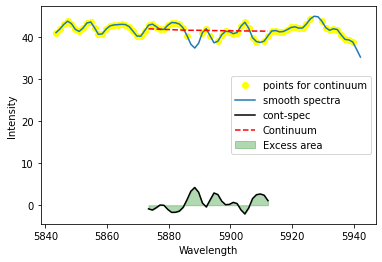

Integral of area over continuum divided by continuum: 0.565 +/- 0.090 at (i,j)= 0 ,  0


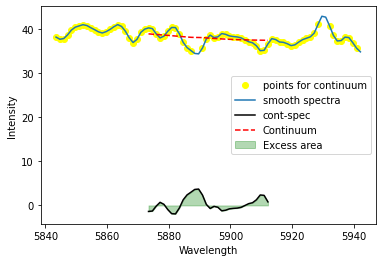

Integral of area over continuum divided by continuum: 0.383 +/- 0.072 at (i,j)= 0 ,  1


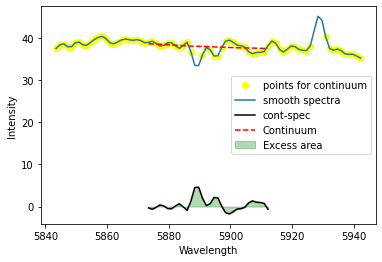

Integral of area over continuum divided by continuum: 0.499 +/- 0.072 at (i,j)= 0 ,  2


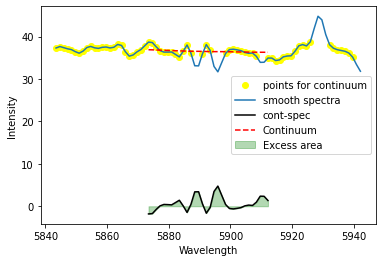

Integral of area over continuum divided by continuum: 0.724 +/- 0.060 at (i,j)= 0 ,  3


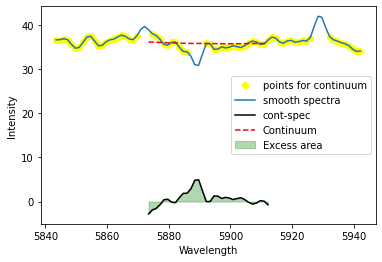

Integral of area over continuum divided by continuum: 0.746 +/- 0.055 at (i,j)= 0 ,  4


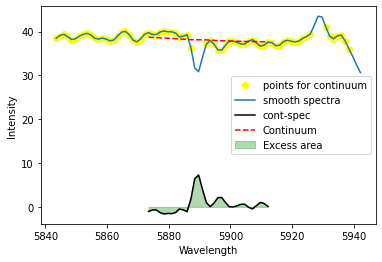

Integral of area over continuum divided by continuum: 0.615 +/- 0.084 at (i,j)= 0 ,  5


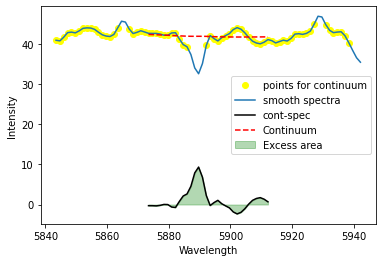

Integral of area over continuum divided by continuum: 0.991 +/- 0.072 at (i,j)= 0 ,  6


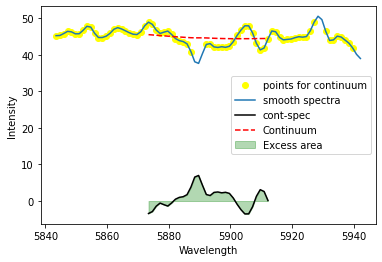

Integral of area over continuum divided by continuum: 0.776 +/- 0.114 at (i,j)= 0 ,  7


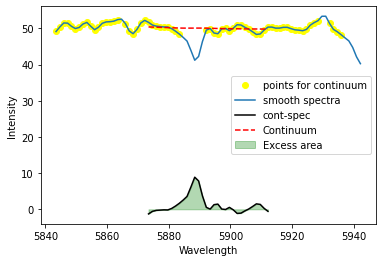

Integral of area over continuum divided by continuum: 0.961 +/- 0.049 at (i,j)= 0 ,  8


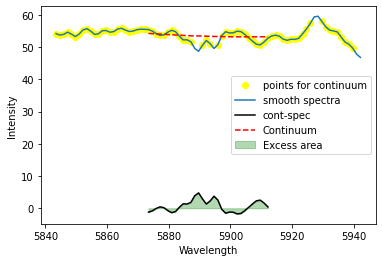

Integral of area over continuum divided by continuum: 0.520 +/- 0.078 at (i,j)= 0 ,  9


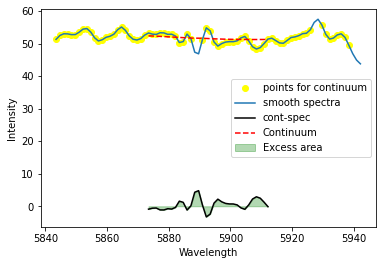

Integral of area over continuum divided by continuum: 0.367 +/- 0.081 at (i,j)= 0 ,  10


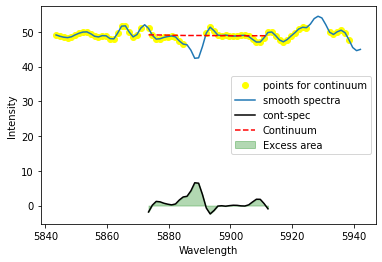

Integral of area over continuum divided by continuum: 0.780 +/- 0.039 at (i,j)= 0 ,  11


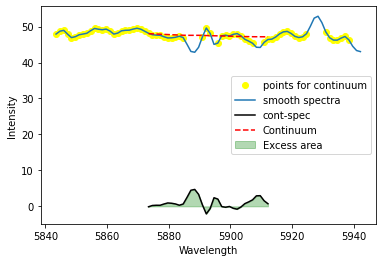

Integral of area over continuum divided by continuum: 0.838 +/- 0.047 at (i,j)= 0 ,  12


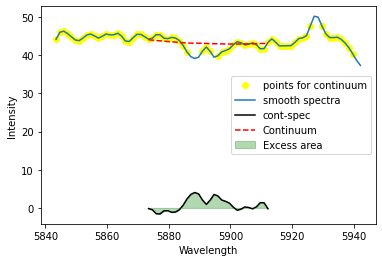

Integral of area over continuum divided by continuum: 0.748 +/- 0.099 at (i,j)= 0 ,  13


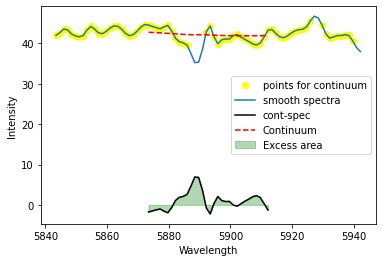

Integral of area over continuum divided by continuum: 0.932 +/- 0.094 at (i,j)= 0 ,  14


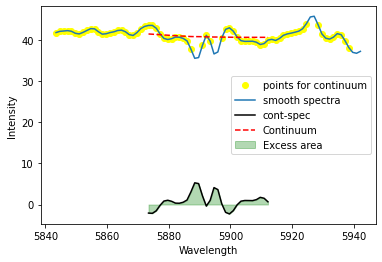

Integral of area over continuum divided by continuum: 0.829 +/- 0.054 at (i,j)= 0 ,  15


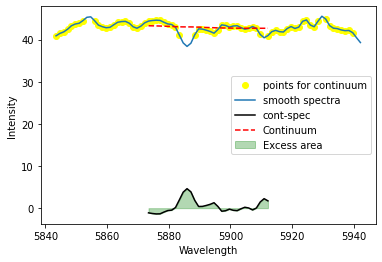

Integral of area over continuum divided by continuum: 0.457 +/- 0.057 at (i,j)= 1 ,  0


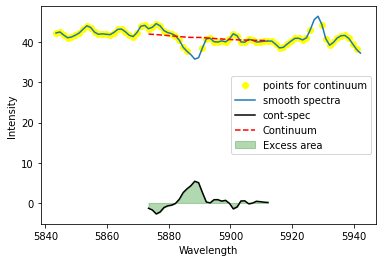

Integral of area over continuum divided by continuum: 0.508 +/- 0.059 at (i,j)= 1 ,  1


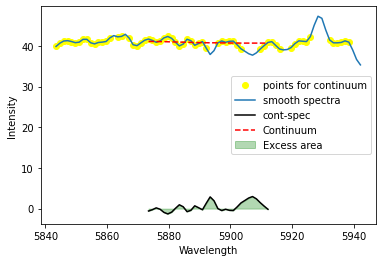

Integral of area over continuum divided by continuum: 0.485 +/- 0.047 at (i,j)= 1 ,  2


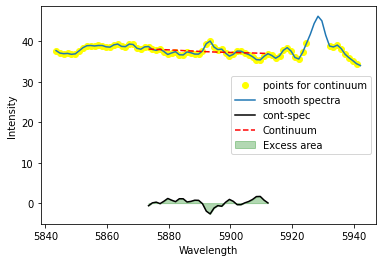

Integral of area over continuum divided by continuum: 0.189 +/- 0.034 at (i,j)= 1 ,  3


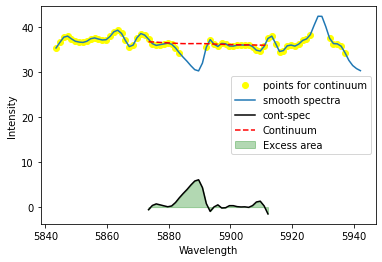

Integral of area over continuum divided by continuum: 1.253 +/- 0.033 at (i,j)= 1 ,  4


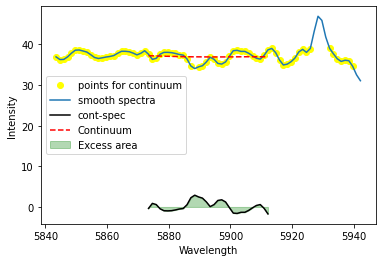

Integral of area over continuum divided by continuum: 0.210 +/- 0.062 at (i,j)= 1 ,  5


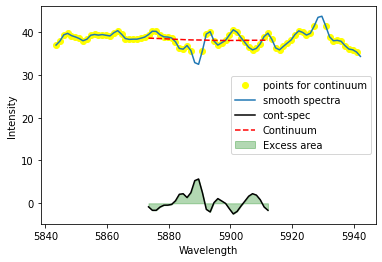

Integral of area over continuum divided by continuum: 0.452 +/- 0.107 at (i,j)= 1 ,  6


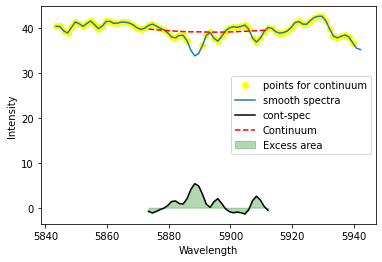

Integral of area over continuum divided by continuum: 0.837 +/- 0.093 at (i,j)= 1 ,  7


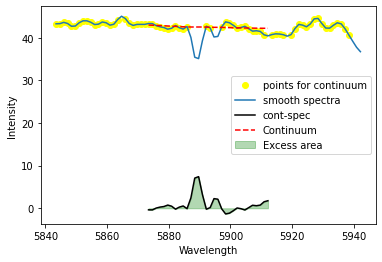

Integral of area over continuum divided by continuum: 0.808 +/- 0.040 at (i,j)= 1 ,  8


KeyboardInterrupt: 

In [93]:
map_NP=EW_map_non_parametric(binned_region,wave,na_rest,mode="both",kernel_size=60,plots=True)

In [78]:
i=findWavelengths(wave, na_rest)[1]

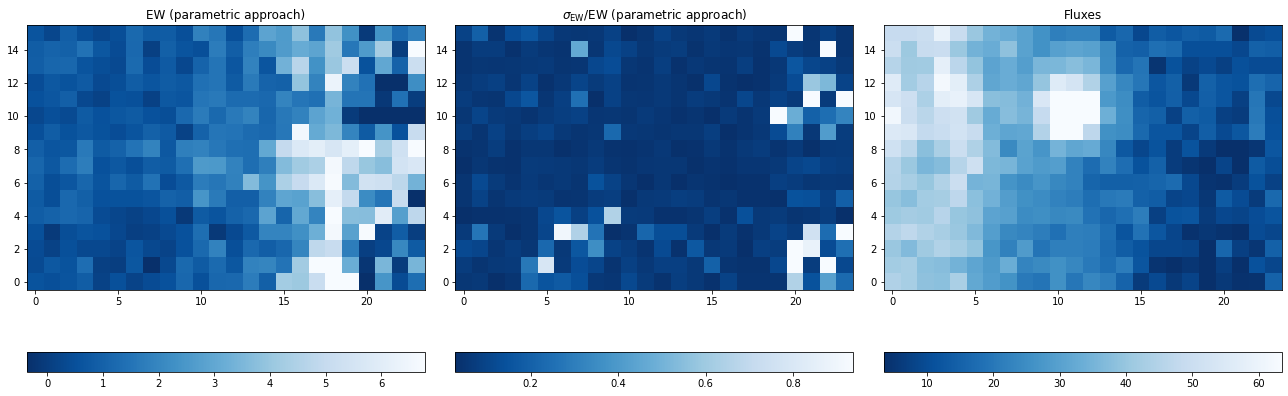

In [79]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

data = np.transpose(map_NP[0])
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
cmap = plt.cm.Blues_r.copy()
cmap.set_bad(color='yellow')
im1 = ax[0].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im1, ax=ax[0], orientation="horizontal")
ax[0].set_title("EW (parametric approach)")

#####

data= np.transpose(abs(map_NP[1]/map_NP[0]))
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im2 = ax[1].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im2, ax=ax[1], orientation="horizontal")
ax[1].set_title(r"$\sigma_{\mathrm{EW}}/\mathrm{EW}$ (parametric approach)")

#####

data = binned_region[i]
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im3 = ax[2].imshow(data, cmap='Blues_r', origin='lower', clim=(lo, up))
fig.colorbar(im3, ax=ax[2], orientation="horizontal")
ax[2].set_title("Fluxes")

plt.tight_layout()
plt.show()

Picking a list of positions to calculate Na EW instead of a map

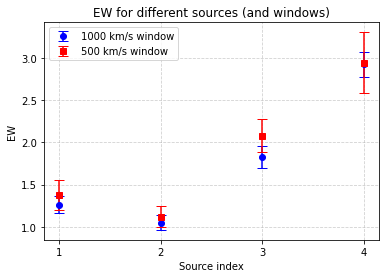

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Data for 1000 km/s window
ew_1000 = [1.26, 1.05, 1.83, 2.92]
err_1000 = [0.0999, 0.0858, 0.1298, 0.1517]

# Data for 500 km/s window
ew_500 = [1.38, 1.12, 2.08, 2.94]
err_500 = [0.1756, 0.1252, 0.1936, 0.3609]

x_pos = np.arange(len(ew_1000))

plt.errorbar(x_pos, ew_1000, yerr=err_1000, fmt='o', label="1000 km/s window", color='blue', capsize=5)
plt.errorbar(x_pos, ew_500, yerr=err_500, fmt='s', label="500 km/s window", color='red', capsize=5)

plt.xlabel("Source index")
plt.ylabel("EW")
plt.title("EW for different sources (and windows)")
plt.xticks(x_pos, ["1", "2", "3", "4"])  # Set x-ticks to match number of measurements
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()
